In [1]:
import torch

import cv2
import albumentations as A
import numpy as np
from PIL import Image
import torchvision

from dataset import RenderDataset

In [2]:
# import random
# import cv2
# from matplotlib import pyplot as plt
# import matplotlib.patches as patches
# import numpy as np
# import albumentations as A


# def visualize(image):
#     plt.figure(figsize=(10, 10))
#     plt.axis('off')
#     plt.imshow(image)
#     plt.show()


# def plot_examples(images, bboxes=None):
#     fig = plt.figure(figsize=(15, 15))
#     columns = 4
#     rows = 5

#     for i in range(1, len(images)):
#         if bboxes is not None:
#             img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
#         else:
#             img = images[i-1]
#         fig.add_subplot(rows, columns, i)
#         plt.imshow(img)
#     plt.show()


# # From https://albumentations.ai/docs/examples/example_bboxes/
# def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
#     """Visualizes a single bounding box on the image"""
#     x_min, y_min, x_max, y_max = map(int, bbox)
#     cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
#     return img

In [22]:
transform = A.Compose(
    [
        A.Resize(width=350, height=350),
        A.RandomCrop(width=256, height=256),
        A.Rotate(limit=40, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=1),        
        A.ChannelShuffle(p=0.2),
        A.CLAHE(p=0.5),
        A.ToGray(p=0.2),
        A.OneOf(
            [
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.5),
            ],
            p=1.0,
        ),
        A.ElasticTransform(p=0.3),
        A.RandomBrightness(),
    ],
    additional_targets={'image0': 'image', 'image1': 'image'}
)

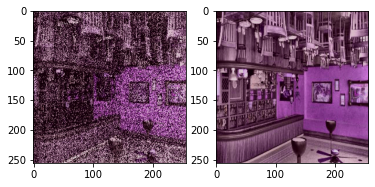

In [90]:
dataset = RenderDataset(images_folder='data_rend', transform=transform)
noise, clean = dataset[50]

import matplotlib.pyplot as plt
f, ax = plt.subplots(1,2)

ax[0].imshow(noise) #first image
ax[1].imshow(clean) #second image
plt.show()